In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mapclassify
import pandas as pd
import numpy as np

Load world dataset from geopandas

Filter USA and visualize it

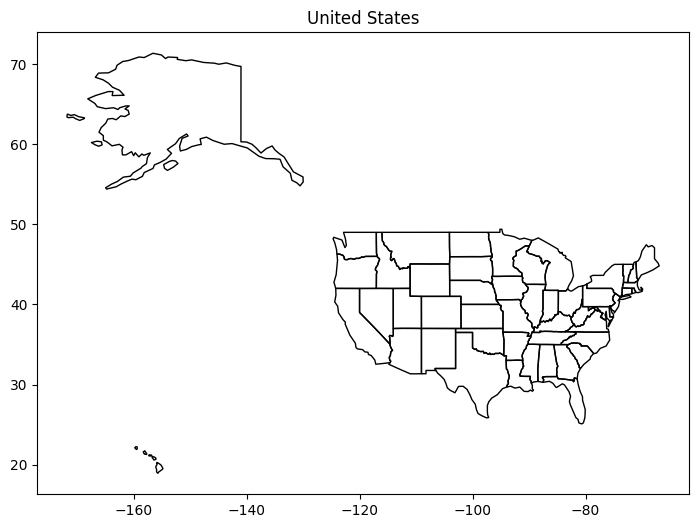

In [3]:
# Load the USA states shapefile
#usa_states = gpd.read_file("E:/ReDi_School/Data_Circle/Project/dataset/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")
usa_states = gpd.read_file("USA_shp_file/ne_110m_admin_1_states_provinces.shp")

# Plot the USA with states
ax = usa_states.plot(figsize=(10, 6), edgecolor='black', color= "none")

# Customize the plot
plt.title("United States")
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")

#Export plot
plt.savefig("Figure/1_USA_base_map", dpi= 300, bbox_inches= 'tight')

plt.show()

In [4]:
usa_states.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


In [5]:
usa_states[usa_states["name"]=="Florida"]

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
29,Admin-1 scale rank,2,USA-3542,3542,US-FL,http://en.wikipedia.org/wiki/Florida,US,5,Florida,FL|Fla.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."


Now load the twitter data

In [6]:
twitter= pd.read_csv("english_tweets.csv")

In [7]:
twitter.head()

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language
0,2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,US,North America,Oregon,trump_df,trump as a student i used to hear for years fo...,en
1,4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,US,North America,District of Columbia,trump_df,you get a tie and you get a tie trump s rally ...,en
2,5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,US,North America,California,trump_df,her 15 minutes were over long time ago omarosa...,en
3,7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,US,North America,Ohio,trump_df,there wont be many of them unless you all have...,en
4,8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,US,North America,Pennsylvania,trump_df,one of the single most effective remedies to e...,en


In [8]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293929 entries, 0 to 293928
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         293929 non-null  int64  
 1   created_at         293929 non-null  object 
 2   tweet              293929 non-null  object 
 3   likes              293929 non-null  float64
 4   retweet_count      293929 non-null  float64
 5   country            293929 non-null  object 
 6   continent          293929 non-null  object 
 7   state              293929 non-null  object 
 8   candidate          293929 non-null  object 
 9   cleaned_tweet      293929 non-null  object 
 10  detected_language  293929 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 24.7+ MB


Create seperate dataframe for trump and biden

In [9]:
twitter_trump= twitter[twitter["candidate"]=="trump_df"]
twitter_biden= twitter[twitter["candidate"]=="biden_df"]

len(twitter_biden)

print("length of trump dataset:", len(twitter_trump), "\nlength of biden dataset:", len(twitter_biden))


length of trump dataset: 164060 
length of biden dataset: 129869


In [10]:
twitter_biden.head()

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language
164060,2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,US,North America,Montana,biden_df,this is how biden made his trumpisnotamerica,en
164061,4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,US,North America,California,biden_df,censorship hunterbiden biden bidenemails biden...,en
164062,6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,US,North America,Illinois,biden_df,in 2020 nypost is being censorship censored by...,en
164063,11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,US,North America,Kentucky,biden_df,fbi allegedly obtained hunter biden computer d...,en
164064,17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,US,North America,Florida,biden_df,comments on this do democrats understand how r...,en


create group by state and get sum of likes

In [11]:
likes_trump= twitter_trump.groupby("state")["likes"].sum()
likes_trump= pd.DataFrame(likes_trump).reset_index().rename(columns={"state": "name"}) #rename the column state as name

likes_biden= twitter_biden.groupby("state")["likes"].sum()
likes_biden= pd.DataFrame(likes_biden).reset_index().rename(columns={"state": "name"})

Merge these two dataframes with usa states dataframe

In [12]:
usa_trump_like= usa_states.merge(likes_trump, on="name", how= "inner")
usa_biden_like= usa_states.merge(likes_biden, on="name", how= "inner")

In [13]:
usa_trump_like.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,likes
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",3682.0
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00...",155.0
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",588.0
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",2288.0
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95...",629.0


Create the dataframe with onl important columns

In [17]:
usa_trump_filter= usa_trump_like[["name", "likes", "geometry"]]
usa_biden_filter= usa_biden_like[["name", "likes", "geometry"]]

In [19]:
#save as gpkg
usa_trump_filter.to_file("USA_shp_file/trump_likes.gpkg")
usa_biden_filter.to_file("USA_shp_file/biden_likes.gpkg")


Now, plot these likes into the map

For Trump

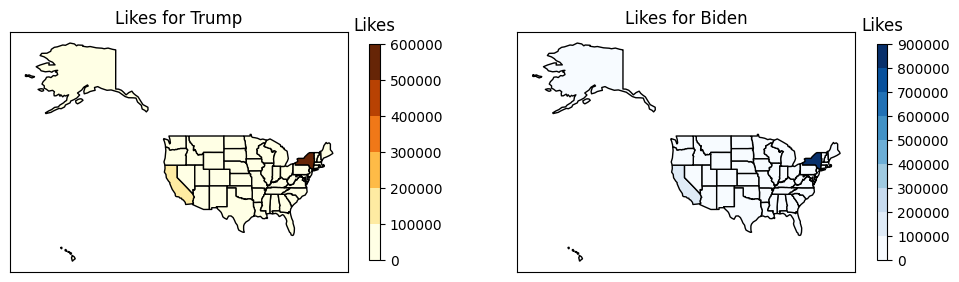

In [ ]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(12,4)

# Define discrete color levels (for example, from 0 to 700,000 in intervals of 100,000)
#levels = np.arange(0, 700001, 100000)  # Adjust based on your data range


#create a list for dataframes
data_frames= [usa_trump_like, usa_biden_like]
candidate= ["Trump", "Biden"]
color_bars= ["YlOrBr", "Blues"]

for index, ax in enumerate(axes.flat):
    
    # Define discrete color levels (for example, from 0 to 700,000 in intervals of 100,000)
    levels = np.arange(0, data_frames[index]["likes"].max(), 100000)  # Adjust based on your data range

    # Create a colormap and a corresponding norm for the levels
    cmap = plt.get_cmap(color_bars[index])
    norm = mcolors.BoundaryNorm(levels, ncolors=cmap.N, clip=True) 
    
    # Plot the USA with states
    data_frames[index].plot(
        ax=ax,
        column="likes",    # Column to base the colors on
        cmap=cmap,         # Use the defined colormap
        norm=norm,         # Apply the discrete color normalization
        edgecolor='black', # Add borderlines for states
        legend=False        # Show legend
    )

    ax.set_title(f"Likes for {candidate[index]}") 

    # Add a colorbar manually
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []  # Empty array for the ScalarMappable
    cbar = fig.colorbar(sm, ax=ax, shrink= 0.7)
    cbar.ax.set_title("Likes", fontsize= 12, pad=10)

    #ax.set_axis_off()
    # Remove tick labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

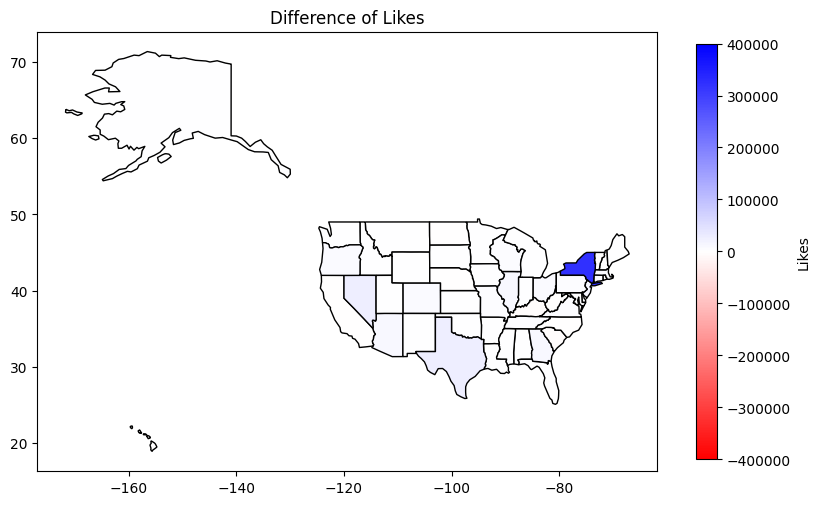

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define discrete color levels (from -400,000 to 400,000 in intervals of 100,000)
levels = np.arange(-400000, 400001, 100000)  # Adjust based on your data range

# Create a diverging colormap from red to blue
colors = ['red', 'white', 'blue']
cmap = mcolors.LinearSegmentedColormap.from_list("RedWhiteBlue", colors)

# Create a normalization object
norm = mcolors.TwoSlopeNorm(vmin=-400000, vcenter=0, vmax=400000)

# Plot the data with discrete colors
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the USA with states
usa_biden_like.plot(
    ax=ax,
    column="difference",    # Column to base the colors on
    cmap=cmap,             # Use the defined colormap
    norm=norm,             # Apply the normalization
    edgecolor='black',     # Add borderlines for states
    legend=False           # Show legend
)
ax.set_title("Difference of Likes")  # Set the title of the plot

# Add a colorbar manually
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Empty array for the ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.9)
cbar.set_label("Likes")

# Show the plot
plt.show()